### Text Classification

For the baseline model(s) on text classification, the data is cleaned, seperated, and vectorized.  Given that the labels are known and theres only 2 options (real or fake), this could be implemented with several models.  I'll use randomforest and HistGradientBoostingClassifier, just to compare the difference and see how they perform.  The models will only be looking at the titles to train on, ideally, I'd like to train the models on text data as well, but it's too computationally expensive to try, as the text in the stories is a lot more data to process. 

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


data\back_up_code.ipynb
data\evaluation.csv
data\Maize Seedling.jpeg
data\pic2textJPG.JPG
data\test.csv
data\train.csv


In [2]:
input_data_path = 'data/'
training_data_file = 'train.csv'
df = pd.read_csv(input_data_path + training_data_file)
df.head()

,id,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization�s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [3]:
real=df[df['label']==1]
fake=df[df['label']==0]

In [4]:
import nltk
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
import re

#---------------------------------------------------------------------------------------------#
## title cleansing
#---------------------------------------------------------------------------------------------#

ttl = " ".join(title for title in df.title)

#get rid of special characters

def cleanTitle(ttl):
    ttl = ttl.str.replace("()", "")
    ttl = ttl.str.replace('(<a).*(>).*()', '')
    ttl = ttl.str.replace('(&amp)', '')
    ttl = ttl.str.replace('(&gt)', '')
    ttl = ttl.str.replace('(&lt)', '')
    ttl = ttl.str.replace('(\xa0)', ' ')
    ttl = ttl.str.replace("~", "")
    ttl = ttl.str.replace("`", "")
    ttl = ttl.str.replace("�", "")    
    ttl = ttl.str.replace("-", "")
    ttl = ttl.str.replace("_", "")  
    return ttldf['title'] == cleanTitle(df['title'])



# convert to lowercase
df['title'] = df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# # remove punctuations
df['title'] = df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))


# df['title'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# split data into train and validation sets: df_train and df_val
from sklearn.model_selection import train_test_split


X = df['title'].copy()


y = df['label'].copy()


X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train_raw)

6538     former trump adviser flynn's son being probed ...
11573    fbi director comey�s decision on hillary clint...
4058     trump to give major north korea speech, then p...
9159     re we are being set up for higher interest rat...
22242    draft senate healthcare bill would link subsid...
                               ...                        
21575    hillary�s state department destroyed 13 of her...
5390     second house panel approves obamacare replacem...
860      six civilians killed by roadside bomb in afgha...
15795    congress moves closer to final tax bill with h...
23654    (video) hilarious! donald trump on jimmy fallo...
Name: title, Length: 19470, dtype: object


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
#import seaborn as sns
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train_raw).toarray()
# an alternative is to use term frequency:
#from sklearn.feature_extraction.text import CountVectorizer
#one_hot_vectorizer = CountVectorizer(binary=True)
#X_train = one_hot_vectorizer.fit_transform(X_train_raw))

print(f"X_train.shape = {X_train.shape}")
print(X_train)

print(f"Number of samples: {X_train.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
#print(f"Number of catagories: {X_train.shape[2]}")

X_train.shape = (19470, 16807)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Number of samples: 19470
Number of features: 16807


### testing and validating RandomForestClassifier


accuracy (on X_train): 0.9976


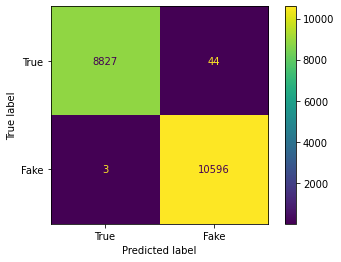

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier().fit(X_train, y_train)

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['True', 'Fake'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(y_train, predictions_train):.4f}")

In [8]:
X_val = tfidf_vectorizer.transform(X_val_raw).toarray()
print(f"X_val.shape = {X_val.shape}")
type(X_val)

X_val.shape = (4868, 16807)


numpy.ndarray

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2228
           1       0.91      0.95      0.93      2640

    accuracy                           0.92      4868
   macro avg       0.92      0.92      0.92      4868
weighted avg       0.92      0.92      0.92      4868

accuracy (on X_train): 0.9197


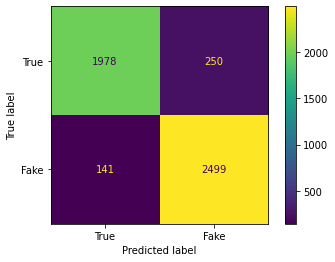

In [9]:
from sklearn.metrics import classification_report

predictions_val = model.predict(X_val)

print(classification_report(y_val, predictions_val))
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val), display_labels=['True', 'Fake'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(y_val, predictions_val):.4f}")

### Adding hyperparamters within the classifier

accuracy (on X_train): 0.9976


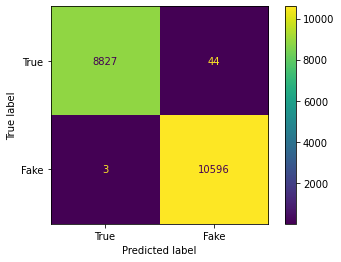

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier(n_estimators=100,criterion='log_loss')
model.fit(X_train, y_train)

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['True', 'Fake'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(y_train, predictions_train):.4f}")

In [11]:
X_val = tfidf_vectorizer.transform(X_val_raw).toarray()
print(f"X_val.shape = {X_val.shape}")
type(X_val)

X_val.shape = (4868, 16807)


numpy.ndarray

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      2228
           1       0.91      0.95      0.93      2640

    accuracy                           0.92      4868
   macro avg       0.92      0.92      0.92      4868
weighted avg       0.92      0.92      0.92      4868

accuracy (on X_train): 0.9217


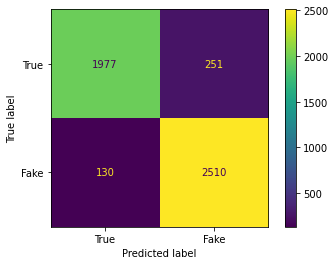

In [12]:
from sklearn.metrics import classification_report

predictions_val = model.predict(X_val)

print(classification_report(y_val, predictions_val))

disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val), display_labels=['True', 'Fake'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(y_val, predictions_val):.4f}")

### testing and validating HistGradientBoostingClassifier

Seeing as the model I used prior performed really well in the assignment, I'll be using it here as one more example, I suspect it will be the best in terms of performance.


accuracy (on X_train): 0.9389


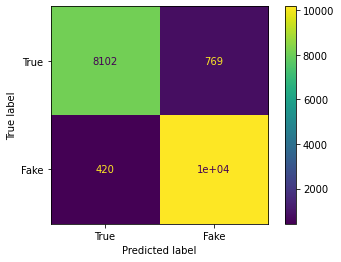

In [13]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

model = HistGradientBoostingClassifier()
model = model.fit(X_train, y_train)
# model = model.fit()

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['True', 'Fake'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(y_train, predictions_train):.4f}")

In [14]:
X_val = tfidf_vectorizer.transform(X_val_raw).toarray()
print(f"X_val.shape = {X_val.shape}")
type(X_val)

X_val.shape = (4868, 16807)


numpy.ndarray

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      2228
           1       0.90      0.95      0.92      2640

    accuracy                           0.92      4868
   macro avg       0.92      0.91      0.91      4868
weighted avg       0.92      0.92      0.92      4868

accuracy (on X_train): 0.9160


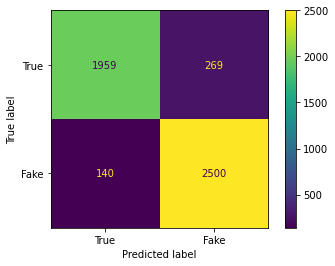

In [15]:
from sklearn.metrics import classification_report

predictions_val = model.predict(X_val)

print(classification_report(y_val, predictions_val))


disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val), display_labels=['True', 'Fake'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(y_val, predictions_val):.4f}")

### tuning hyperparameters for HistGradientBoostingClassifier

accuracy (on X_train): 0.9427


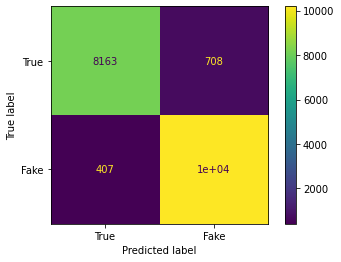

In [16]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

model = HistGradientBoostingClassifier(loss='log_loss', learning_rate=.2,max_iter=42, max_bins=5,max_leaf_nodes=64,max_depth=48,min_samples_leaf=16)
model = model.fit(X_train, y_train)
# model = model.fit()

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['True', 'Fake'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(y_train, predictions_train):.4f}")

In [17]:
X_val = tfidf_vectorizer.transform(X_val_raw).toarray()
print(f"X_val.shape = {X_val.shape}")
type(X_val)

X_val.shape = (4868, 16807)


numpy.ndarray

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2228
           1       0.90      0.94      0.92      2640

    accuracy                           0.91      4868
   macro avg       0.91      0.91      0.91      4868
weighted avg       0.91      0.91      0.91      4868

accuracy (on X_train): 0.9111


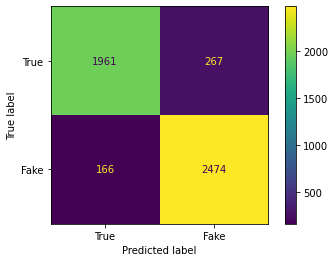

In [18]:
from sklearn.metrics import classification_report

predictions_val = model.predict(X_val)

print(classification_report(y_val, predictions_val))


disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val), display_labels=['True', 'Fake'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(y_val, predictions_val):.4f}")

## Summary

Great, realistically all models are really good from a performance standpoint randomforest classifier had good results, even without fine tuning the model, and even adding some hyperparameters only changes the result ever so slightly.  Using the "HistGradientBoostingClassifier", the results weren't as expected, I'd thought it perform much better than the randomforest.  Perhaps only having data to train on 2 labels doesn't make this the bast case senario to implement it in.  
______________________________________________________________________________________________________________________

# Text Summarization

For the text summarization, I'll start by exploring topic modeling, a concept I think is interesting to look at. This is also useful as when you summarize a text, understanding what is seen as a topic may also be important in a summary of a story.  For the text summarization baseline model to evaluate them becomes more subjective.  The goal here to tell if the summary is getting the more important aspects of the story, in the summary.  If it isn't then there are metrics to determine how much it missed those weighted aspects.  Likewise, the summary should read coherently and actually reflect the whole text it summizes.

The article I wanted to summarize, is a research paper from Austrailia, where scientist successfully planted human neurons into a dish and taught it too play pong with some meangingful results.  That is my version of the summary for this story.  I'm hoping that there is enough text here to work with, that both the original text and the summary results can be compared and discuss the metrics on how to evaluate this.

article link: https://www.npr.org/sections/health-shots/2022/10/14/1128875298/brain-cells-neurons-learn-video-game-pong

## Topic Modeling

Topic modeling involves counting words and grouping similar word patterns to infer topics within unstructured data.  Given a article to analyze, it may be useful to see what words are grouped together and see if then we can make an inference as to what that topic would be.  The topic modeling should be confirming what I have as a summary from the article.  


In [1]:
text = """A dish of living brain cells has learned to play the 1970s arcade game Pong.
About 800,000 cells linked to a computer gradually learned to sense the position of the game's electronic ball and control a virtual paddle, a team reports in the journal Neuron.
The novel achievement is part of an effort to understand how the brain learns, and how to make computers more intelligent.
"We've made huge strides with silicon computing, but they're still rigid and inflexible," says Brett Kagan, an author of the study and chief scientific officer at Cortical Labs in Melbourne, Australia. "That's something we don't see with biology."
For example, both computers and people can learn to make a cup of tea, Kagan says. But people are able to generalize what they've learned in a way a computer can't.
"You might have never been to someone else's house, but with a bit of rummaging and searching you can probably make a decent cup of tea as long as I've got the ingredients," he says. But even a very powerful computer would struggle to carry out that task in an unfamiliar environment.
So Cortical Labs has been trying to understand how living brain cells acquire this sort of intelligence. And Kagan says the Pong experiment was a way for the company to answer a key question about how a network of brain cells learns to change its behavior:
"If we allow these cells to know the outcome of their actions, will they actually be able to change in some sort of goal-directed way," Kagan says.
To find out, the scientists used a system they've developed called DishBrain. A layer of living neurons is grown on a special silicon chip at the bottom of a thumb-size dish filled with nutrients. The chip, which is linked to a computer, can both detect electrical signals produced by the neurons, and deliver electrical signals to them.
To test the learning ability of the cells, the computer generated a game of Pong, a two-dimensional version of table tennis that gained a cult following as one of the first and most basic video games.
Pong is played on a video screen. A black rectangle defines the table, and a white cursor represents each player's paddle, which can be moved up or down to intercept a white ball.
In the simplified version used in the experiment, there was a single paddle on the left side of the virtual table, and the ball would carom off the other sides until it evaded the paddle.
To allow the brain cells to play the game, the computer sent signals to them indicating where the bouncing ball was. At the same time, it began monitoring information coming from the cells in the form of electrical pulses.
"We took that information and we allowed it to influence this Pong game that they were playing," Kagan says. "So they could move the paddle around."
At first, the cells didn't understand the signals coming from the computer, or know what signals to send the other direction. They also had no reason to play the game.
So the scientists tried to motivate the cells using electrical stimulation: a nicely organized burst of electrical activity if they got it right. When they got it wrong, the result was a chaotic stream of white noise.
"If they hit the ball, we gave them something predictable," Kagan says. "When they missed it, they got something that was totally unpredictable."
The strategy was based on the Free Energy Principle, which states that brain cells want to be able to predict what's going on in their environment. So they would choose predictable stimulation over unpredictable stimulation.
The approach worked. Cells began to learn to generate patterns of electrical activity that would move the paddle in front of the ball, and gradually rallies got longer.
The brain cells never got that good at Pong. But interestingly, human brain cells seemed to achieve a slightly higher level of play than mouse brain cells, Kagan says.
And the level of play was remarkable, considering that each network contained fewer cells than the brain of a cockroach, Kagan says.
"If you could see a cockroach playing a game of Pong and it was able to hit the ball twice as often as it was missing it, you would be pretty impressed with that cockroach," he says.
The results hint at a future in which biology helps computers become more intelligent by changing the way that they learn, Kagan says.
But that future is probably still a long way off, says Steve M. Potter, an adjunct associate professor at Georgia Tech.
"The idea of a computer that has some living components is exciting and it's starting to become a reality," he says. "However, the kinds of learning that these things can accomplish is quite rudimentary right now."
Even so, Potter says the system that allowed cells to learn Pong could be a great tool for doing research.
"This is sort of a semi-living animal model that one can use to study all sorts of mechanisms in the nervous system, not just learning," he says.
"""

In [30]:
from gensim import corpora

# Convert to list
data = text.split("delimiter")
print(data[:1])


#Tokenize the sentence into words
tokens = [word for word in text.split()]

dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow(tokens) for text in data]


['A dish of living brain cells has learned to play the 1970s arcade game Pong.\nAbout 800,000 cells linked to a computer gradually learned to sense the position of the game\'s electronic ball and control a virtual paddle, a team reports in the journal Neuron.\nThe novel achievement is part of an effort to understand how the brain learns, and how to make computers more intelligent.\n"We\'ve made huge strides with silicon computing, but they\'re still rigid and inflexible," says Brett Kagan, an author of the study and chief scientific officer at Cortical Labs in Melbourne, Australia. "That\'s something we don\'t see with biology."\nFor example, both computers and people can learn to make a cup of tea, Kagan says. But people are able to generalize what they\'ve learned in a way a computer can\'t.\n"You might have never been to someone else\'s house, but with a bit of rummaging and searching you can probably make a decent cup of tea as long as I\'ve got the ingredients," he says. But even 

### viewing topics


In [3]:
from sklearn.decomposition import LatentDirichletAllocation

def print_topics(model, count_vectorizer, n_top_words):
    ''' Print the topics detected and the n_top_words that contains
    Input:
       - model: LDA model for the text
       - count_cectorizer: the count vectorizer object
       - n_top_words: the number of words to consider in a topic
    '''
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
 
 # Apply the LDA method to discover the topics
lda_model = LatentDirichletAllocation(n_components=4, learning_method='online', max_iter=10, random_state=42).fit(tf)
# Show the topics and the 10 more relevant words in each topic
no_top_words = 18
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_model, tf_vectorizer, no_top_words)

Topics found via LDA:

Topic #0:
the has pong says to brain contained hint worked that network player is of intercept rigid able environment

Topic #1:
they the learn began that is model them brain of test struggle cells know learns signals says achievement

Topic #2:
the to of that cells and says they in brain it kagan was is pong computer can game

Topic #3:
the to of cells says and in that it they was kagan computer brain pong learn be way


Here we see the top 4 topics returned, notice every topic has grouped those words as a similar pattern.  That these words are weighted more importantly to describe the topic.  Which  to be fair, it seems that the topics are pretty much the same.  Which is expexted, as this is one story that only talks about one thing in it.  Usually topic modeling is better suited when given a lot of doucments to review.  However, I still think this is a good sign that the important words its noticing is hopefully going to be in the summary later on. 

In [5]:
import gensim
import re

def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = text.split("delimiter")
data_words = list(sent_to_words(data))


In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy

stopwords = set(stopwords.words("english"))


# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stopwords=stopwords, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stopwords] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

# print(data_ready)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\spacy\language.py:1895: UserWarning: [W123] Argument disable with value ['parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


### here is the grouping of keywords per the topic

As a means of guiding this, this is a variation of the code above, it printing the words and their weight with respect to the topic, in each topic.  So lets look at just that firt topic and drill down a bit.

In [7]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

print(lda_model.print_topics())

[(0, '0.037*"cell" + 0.033*"say" + 0.024*"computer" + 0.024*"learn" + 0.022*"brain" + 0.018*"game" + 0.016*"ball" + 0.014*"play" + 0.014*"paddle" + 0.014*"get"'), (1, '0.004*"cell" + 0.004*"learn" + 0.004*"brain" + 0.004*"say" + 0.004*"computer" + 0.004*"game" + 0.004*"ball" + 0.004*"pong" + 0.004*"paddle" + 0.004*"get"'), (2, '0.005*"cell" + 0.005*"say" + 0.005*"computer" + 0.005*"brain" + 0.005*"learn" + 0.005*"game" + 0.005*"ball" + 0.005*"way" + 0.005*"signal" + 0.005*"play"'), (3, '0.007*"cell" + 0.006*"say" + 0.006*"brain" + 0.005*"learn" + 0.005*"computer" + 0.005*"game" + 0.005*"electrical" + 0.005*"ball" + 0.005*"get" + 0.005*"paddle"')]


In [35]:
topicList = lda_model.print_topics()
firstTopic = topicList[0]

firstTopic2Str = ','.join(str(i) for i in firstTopic)

topic0Cleaned = firstTopic2Str.split('+')

for value in topic0Cleaned:
    print(value)

0,0.037*"cell" 
 0.033*"say" 
 0.024*"computer" 
 0.024*"learn" 
 0.022*"brain" 
 0.018*"game" 
 0.016*"ball" 
 0.014*"play" 
 0.014*"paddle" 
 0.014*"get"


Each word and the value tied to it represents the top 10 keywordd for that topic, which probably would be best described as "machine learning" if I was to put a topic on it.  You can see that "cell" gets the most weight to it versus "get", but they are all needed to describe the topic.  These keywords are what I'm look at because what the topic model generates as topic(s), I'm hoping to see those saem topics or some of them, in the summary.

## text summarization

In [37]:
# Source for code: https://blog.floydhub.com/gentle-introduction-to-text-summarization-in-machine-learning/

import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

article_content  = """A dish of living brain cells has learned to play the 1970s arcade game Pong.
About 800,000 cells linked to a computer gradually learned to sense the position of the game's electronic ball and control a virtual paddle, a team reports in the journal Neuron.
The novel achievement is part of an effort to understand how the brain learns, and how to make computers more intelligent.
"We've made huge strides with silicon computing, but they're still rigid and inflexible," says Brett Kagan, an author of the study and chief scientific officer at Cortical Labs in Melbourne, Australia. "That's something we don't see with biology."
For example, both computers and people can learn to make a cup of tea, Kagan says. But people are able to generalize what they've learned in a way a computer can't.
"You might have never been to someone else's house, but with a bit of rummaging and searching you can probably make a decent cup of tea as long as I've got the ingredients," he says. But even a very powerful computer would struggle to carry out that task in an unfamiliar environment.
So Cortical Labs has been trying to understand how living brain cells acquire this sort of intelligence. And Kagan says the Pong experiment was a way for the company to answer a key question about how a network of brain cells learns to change its behavior:
"If we allow these cells to know the outcome of their actions, will they actually be able to change in some sort of goal-directed way," Kagan says.
To find out, the scientists used a system they've developed called DishBrain. A layer of living neurons is grown on a special silicon chip at the bottom of a thumb-size dish filled with nutrients. The chip, which is linked to a computer, can both detect electrical signals produced by the neurons, and deliver electrical signals to them.
To test the learning ability of the cells, the computer generated a game of Pong, a two-dimensional version of table tennis that gained a cult following as one of the first and most basic video games.
Pong is played on a video screen. A black rectangle defines the table, and a white cursor represents each player's paddle, which can be moved up or down to intercept a white ball.
In the simplified version used in the experiment, there was a single paddle on the left side of the virtual table, and the ball would carom off the other sides until it evaded the paddle.
To allow the brain cells to play the game, the computer sent signals to them indicating where the bouncing ball was. At the same time, it began monitoring information coming from the cells in the form of electrical pulses.
"We took that information and we allowed it to influence this Pong game that they were playing," Kagan says. "So they could move the paddle around."
At first, the cells didn't understand the signals coming from the computer, or know what signals to send the other direction. They also had no reason to play the game.
So the scientists tried to motivate the cells using electrical stimulation: a nicely organized burst of electrical activity if they got it right. When they got it wrong, the result was a chaotic stream of white noise.
"If they hit the ball, we gave them something predictable," Kagan says. "When they missed it, they got something that was totally unpredictable."
The strategy was based on the Free Energy Principle, which states that brain cells want to be able to predict what's going on in their environment. So they would choose predictable stimulation over unpredictable stimulation.
The approach worked. Cells began to learn to generate patterns of electrical activity that would move the paddle in front of the ball, and gradually rallies got longer.
The brain cells never got that good at Pong. But interestingly, human brain cells seemed to achieve a slightly higher level of play than mouse brain cells, Kagan says.
And the level of play was remarkable, considering that each network contained fewer cells than the brain of a cockroach, Kagan says.
"If you could see a cockroach playing a game of Pong and it was able to hit the ball twice as often as it was missing it, you would be pretty impressed with that cockroach," he says.
The results hint at a future in which biology helps computers become more intelligent by changing the way that they learn, Kagan says.
But that future is probably still a long way off, says Steve M. Potter, an adjunct associate professor at Georgia Tech.
"The idea of a computer that has some living components is exciting and it's starting to become a reality," he says. "However, the kinds of learning that these things can accomplish is quite rudimentary right now."
Even so, Potter says the system that allowed cells to learn Pong could be a great tool for doing research.
"This is sort of a semi-living animal model that one can use to study all sorts of mechanisms in the nervous system, not just learning," he says.
"""

def _create_dictionary_table(text_string) -> dict:
       
    #removing stop words
    stop_words = set(stopwords.words("english"))
    
    words = word_tokenize(text_string)
    
    #reducing words to their root form
    stem = PorterStemmer()
    
    #creating dictionary for the word frequency table
    frequency_table = dict()
    for wd in words:
        wd = stem.stem(wd)
        if wd in stop_words:
            continue
        if wd in frequency_table:
            frequency_table[wd] += 1
        else:
            frequency_table[wd] = 1

    return frequency_table


def _calculate_sentence_scores(sentences, frequency_table) -> dict:   

    #algorithm for scoring a sentence by its words
    sentence_weight = dict()

    for sentence in sentences:
        sentence_wordcount = (len(word_tokenize(sentence)))
        sentence_wordcount_without_stop_words = 0
        for word_weight in frequency_table:
            if word_weight in sentence.lower():
                sentence_wordcount_without_stop_words += 1
                if sentence[:7] in sentence_weight:
                    sentence_weight[sentence[:7]] += frequency_table[word_weight]
                else:
                    sentence_weight[sentence[:7]] = frequency_table[word_weight]

        sentence_weight[sentence[:7]] = sentence_weight[sentence[:7]] / sentence_wordcount_without_stop_words

       

    return sentence_weight

def _calculate_average_score(sentence_weight) -> int:
   
    #calculating the average score for the sentences
    sum_values = 0
    for entry in sentence_weight:
        sum_values += sentence_weight[entry]

    #getting sentence average value from source text
    average_score = (sum_values / len(sentence_weight))

    return average_score

def _get_article_summary(sentences, sentence_weight, threshold):
    sentence_counter = 0
    article_summary = ''

    for sentence in sentences:
        if sentence[:7] in sentence_weight and sentence_weight[sentence[:7]] >= (threshold):
            article_summary += " " + sentence
            sentence_counter += 1

    return article_summary

def _run_article_summary(article):
    
    #creating a dictionary for the word frequency table
    frequency_table = _create_dictionary_table(article)

    #tokenizing the sentences
    sentences = sent_tokenize(article)

    #algorithm for scoring a sentence by its words
    sentence_scores = _calculate_sentence_scores(sentences, frequency_table)

    #getting the threshold
    threshold = _calculate_average_score(sentence_scores)

    #producing the summary
    article_summary = _get_article_summary(sentences, sentence_scores, 1.1 * threshold)

    return article_summary

if __name__ == '__main__':
    summary_results = _run_article_summary(article_content)
    print(summary_results)

 The novel achievement is part of an effort to understand how the brain learns, and how to make computers more intelligent. For example, both computers and people can learn to make a cup of tea, Kagan says. Pong is played on a video screen. To allow the brain cells to play the game, the computer sent signals to them indicating where the bouncing ball was. At the same time, it began monitoring information coming from the cells in the form of electrical pulses. "We took that information and we allowed it to influence this Pong game that they were playing," Kagan says. "So they could move the paddle around." At first, the cells didn't understand the signals coming from the computer, or know what signals to send the other direction. They also had no reason to play the game. "If they hit the ball, we gave them something predictable," Kagan says. The approach worked. The brain cells never got that good at Pong. But interestingly, human brain cells seemed to achieve a slightly higher level of

### Second reference extractive summary model to compare against 

In [33]:
# Extractive summarize
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
parser = PlaintextParser.from_string(text, Tokenizer("english"))
summarizer = LexRankSummarizer()
extractve_summarization  = summarizer(parser.document,5)
extractve_summarization = ' '.join([str(s) for s in list(extractve_summarization)])

print(extractve_summarization)

A dish of living brain cells has learned to play the 1970s arcade game Pong. And Kagan says the Pong experiment was a way for the company to answer a key question about how a network of brain cells learns to change its behavior: "If we allow these cells to know the outcome of their actions, will they actually be able to change in some sort of goal-directed way," Kagan says. To allow the brain cells to play the game, the computer sent signals to them indicating where the bouncing ball was. So the scientists tried to motivate the cells using electrical stimulation: a nicely organized burst of electrical activity if they got it right. "If you could see a cockroach playing a game of Pong and it was able to hit the ball twice as often as it was missing it, you would be pretty impressed with that cockroach," he says.


## Evaluating the text summary

What do we want from the summary?  It needs to be concise, not give us fake or bad data, it needs to hit the main points of the article or body of text in general and give that back to us in a meaninigful way, and finally read coherently.  The first summary result is maybe a little larger than I'd like, especially comparing it to the other example which a little more condensed.  It also isn't all that coherent to be fair, some sentences seem out of place or don't really add to the summary itself.  However, I still think overall it did well.  I think the second gerneated summary is overall better as well, but its just a reference to compare.  

### Metrics

In text summarization models, it is hard evaluate them with standard scores as in the text classification models.  However, it does follow that we can compare the original text with that the summary put out and see how much of the original keywords were kept.  This brings in ROUGE, rouge measure recall, it recalls how many or how much the words in the summary appeared in the original text.  For example, if the text was "I really love machine learning" and the summary I got back was "Love machine learning".  The rouge score should be pretty high as this captured most of the words in the original text.  

In [40]:
#evaluating the summary results
from rouge import Rouge

ref = text
summaryModel = summary_results

rouge = Rouge()
rouge.get_scores(ref, summaryModel)



[{'rouge-1': {'r': 1.0, 'p': 0.3458646616541353, 'f': 0.5139664766280704},
  'rouge-2': {'r': 0.9666666666666667,
   'p': 0.26710526315789473,
   'f': 0.4185566976384314},
  'rouge-l': {'r': 1.0, 'p': 0.3458646616541353, 'f': 0.5139664766280704}}]

In [39]:
#evaluating the  reference summary results

from rouge import Rouge

ref = text
summaryModel = extractve_summarization

rouge = Rouge()
rouge.get_scores(ref, summaryModel)

[{'rouge-1': {'r': 1.0, 'p': 0.24060150375939848, 'f': 0.3878787847522498},
  'rouge-2': {'r': 0.9788732394366197,
   'p': 0.18289473684210528,
   'f': 0.3082039884779328},
  'rouge-l': {'r': 1.0, 'p': 0.24060150375939848, 'f': 0.3878787847522498}}]

for context:
* p = precision
* r =  recall
* f = F1 score

* rouge-1 =  refers to the overlap of unigram (each word)
* rouge-2 = refers to the overlap of bigrams 

It seems that my summary model performed pretty well, better than the reference example.  Given my summary is bigger and therefor contains more of the original text, this may not be far.  However, still for a baseline model this isn't bad and its working completely from the text and code, no libraries.  

Going forward I'll use a different method to summarization, an abstractive summary and compare that to the baseline model